
# Volatility Interpolation in 2D Space for Options

In this notebook, we will use the `yfinance` library to retrieve options data for. Using this data, we will construct a 2D interpolation grid to visualize implied volatility across various strike prices and expiration days.



### Step 1: Import Necessary Libraries
We need the following libraries:
- **yfinance**: For accessing options data.
- **numpy**: For data manipulation and numerical operations.
- **matplotlib**: For visualizing the interpolated volatility surface.
- **scipy.interpolate**: To perform 2D interpolation on the implied volatility data.


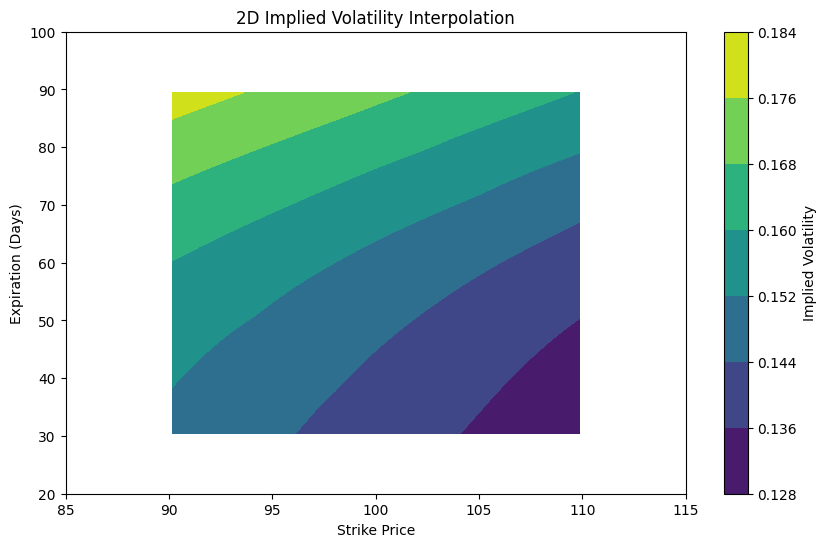

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Sample data for strikes, expirations (in days), and implied volatilities
strikes = np.array([90, 100, 110, 90, 100, 110, 90, 100, 110])
expirations = np.array([30, 30, 30, 60, 60, 60, 90, 90, 90])
implied_vols = np.array([0.15, 0.14, 0.13, 0.16, 0.15, 0.14, 0.18, 0.17, 0.16])

# Create a grid for strikes and expirations for interpolation
strike_grid = np.linspace(85, 115, 100)
expiration_grid = np.linspace(20, 100, 100)
strike_grid, expiration_grid = np.meshgrid(strike_grid, expiration_grid)

# Interpolating the implied volatilities over the 2D space
implied_vols_grid = griddata(
    (strikes, expirations),
    implied_vols,
    (strike_grid, expiration_grid),
    method='cubic'
)

# Plot the interpolated volatility surface
plt.figure(figsize=(10, 6))
cp = plt.contourf(strike_grid, expiration_grid, implied_vols_grid, cmap='viridis')
plt.colorbar(cp, label="Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Expiration (Days)")
plt.title("2D Implied Volatility Interpolation")
plt.show()



### Step 2: Fetch Options Data
Here, we use `yfinance` to fetch options data.


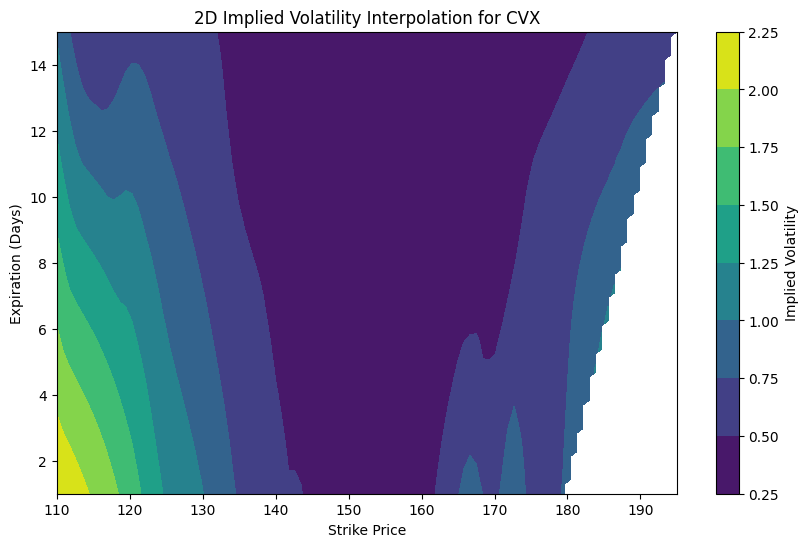

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime

# Define the ticker symbol
ticker = 'CVX'

# Fetch the options data for a given stock ticker
stock = yf.Ticker(ticker)

# Initialize lists to store strikes, expirations, and implied volatilities
strikes = []
expirations = []
implied_vols = []

# Get the list of expiration dates
exp_dates = stock.options[:3]  # Limit to first 3 expiration dates for this example

# Loop through expiration dates and strikes to collect implied volatility data
for exp_date in exp_dates:
    options = stock.option_chain(exp_date)
    calls = options.calls  # We focus on call options in this example

    # Loop through each call option's strike and implied volatility
    for index, row in calls.iterrows():
        strike = row['strike']
        iv = row['impliedVolatility']
        expiration_days = (datetime.strptime(exp_date, '%Y-%m-%d') - datetime.now()).days

        # Store data
        strikes.append(strike)
        expirations.append(expiration_days)
        implied_vols.append(iv)

# Convert to numpy arrays
strikes = np.array(strikes)
expirations = np.array(expirations)
implied_vols = np.array(implied_vols)

# Create a grid for strikes and expirations for interpolation
strike_grid = np.linspace(min(strikes), max(strikes), 100)
expiration_grid = np.linspace(min(expirations), max(expirations), 100)
strike_grid, expiration_grid = np.meshgrid(strike_grid, expiration_grid)

# Interpolating the implied volatilities over the 2D space
implied_vols_grid = griddata(
    (strikes, expirations),
    implied_vols,
    (strike_grid, expiration_grid),
    method='cubic'
)

# Plot the interpolated volatility surface
plt.figure(figsize=(10, 6))
cp = plt.contourf(strike_grid, expiration_grid, implied_vols_grid, cmap='viridis')
plt.colorbar(cp, label="Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Expiration (Days)")
plt.title(f"2D Implied Volatility Interpolation for {ticker}")
plt.show()



### Step 3: Data Processing and Filtering
We’ll extract the `strike price`, `expiration days`, and `implied volatility` for each option contract, storing them in lists.


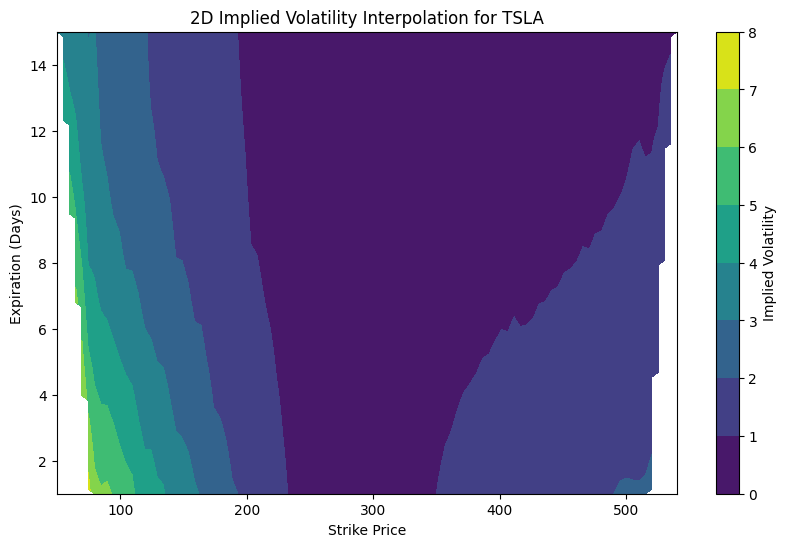

In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime

# Define the ticker symbol
ticker = 'TSLA'

# Fetch the options data for a given stock ticker
stock = yf.Ticker(ticker)

# Initialize lists to store strikes, expirations, and implied volatilities
strikes = []
expirations = []
implied_vols = []

# Get the list of expiration dates
exp_dates = stock.options[:3]  # Limit to first 3 expiration dates for this example

# Loop through expiration dates and strikes to collect implied volatility data
for exp_date in exp_dates:
    options = stock.option_chain(exp_date)
    calls = options.calls  # We focus on call options in this example

    # Loop through each call option's strike and implied volatility
    for index, row in calls.iterrows():
        strike = row['strike']
        iv = row['impliedVolatility']
        expiration_days = (datetime.strptime(exp_date, '%Y-%m-%d') - datetime.now()).days

        # Store data
        strikes.append(strike)
        expirations.append(expiration_days)
        implied_vols.append(iv)

# Convert to numpy arrays
strikes = np.array(strikes)
expirations = np.array(expirations)
implied_vols = np.array(implied_vols)

# Create a grid for strikes and expirations for interpolation
strike_grid = np.linspace(min(strikes), max(strikes), 100)
expiration_grid = np.linspace(min(expirations), max(expirations), 100)
strike_grid, expiration_grid = np.meshgrid(strike_grid, expiration_grid)

# Interpolating the implied volatilities over the 2D space
implied_vols_grid = griddata(
    (strikes, expirations),
    implied_vols,
    (strike_grid, expiration_grid),
    method='cubic'
)

# Plot the interpolated volatility surface
plt.figure(figsize=(10, 6))
cp = plt.contourf(strike_grid, expiration_grid, implied_vols_grid, cmap='viridis')
plt.colorbar(cp, label="Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Expiration (Days)")
plt.title(f"2D Implied Volatility Interpolation for {ticker}")
plt.show()



### Step 4: Error Handling and Grid Preparation
If the data lists are empty, display an error message. Otherwise, proceed to create a grid for strike prices and expiration days.


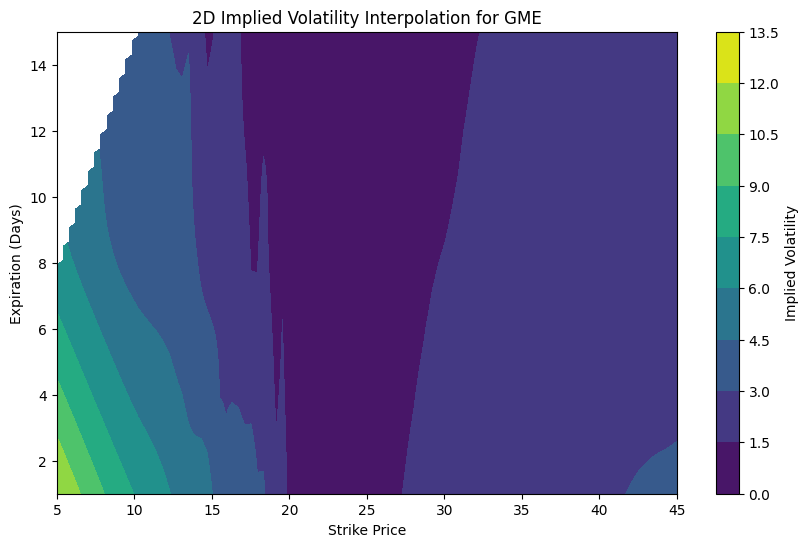

In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime

# Define the ticker symbol
ticker = 'GME'

# Fetch the options data for a given stock ticker
stock = yf.Ticker(ticker)

# Initialize lists to store strikes, expirations, and implied volatilities
strikes = []
expirations = []
implied_vols = []

# Get the list of expiration dates
exp_dates = stock.options[:3]  # Limit to first 3 expiration dates for this example

# Loop through expiration dates and strikes to collect implied volatility data
for exp_date in exp_dates:
    options = stock.option_chain(exp_date)
    calls = options.calls  # We focus on call options in this example

    # Loop through each call option's strike and implied volatility
    for index, row in calls.iterrows():
        strike = row['strike']
        iv = row['impliedVolatility']
        expiration_days = (datetime.strptime(exp_date, '%Y-%m-%d') - datetime.now()).days

        # Store data
        strikes.append(strike)
        expirations.append(expiration_days)
        implied_vols.append(iv)

# Convert to numpy arrays
strikes = np.array(strikes)
expirations = np.array(expirations)
implied_vols = np.array(implied_vols)

# Create a grid for strikes and expirations for interpolation
strike_grid = np.linspace(min(strikes), max(strikes), 100)
expiration_grid = np.linspace(min(expirations), max(expirations), 100)
strike_grid, expiration_grid = np.meshgrid(strike_grid, expiration_grid)

# Interpolating the implied volatilities over the 2D space
implied_vols_grid = griddata(
    (strikes, expirations),
    implied_vols,
    (strike_grid, expiration_grid),
    method='cubic'
)

# Plot the interpolated volatility surface
plt.figure(figsize=(10, 6))
cp = plt.contourf(strike_grid, expiration_grid, implied_vols_grid, cmap='viridis')
plt.colorbar(cp, label="Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Expiration (Days)")
plt.title(f"2D Implied Volatility Interpolation for {ticker}")
plt.show()



### Step 5: Interpolate Implied Volatility Data
Using the `griddata` function, we interpolate the implied volatility values over the created grid. This allows us to estimate volatility values for a continuous surface, which we will visualize.


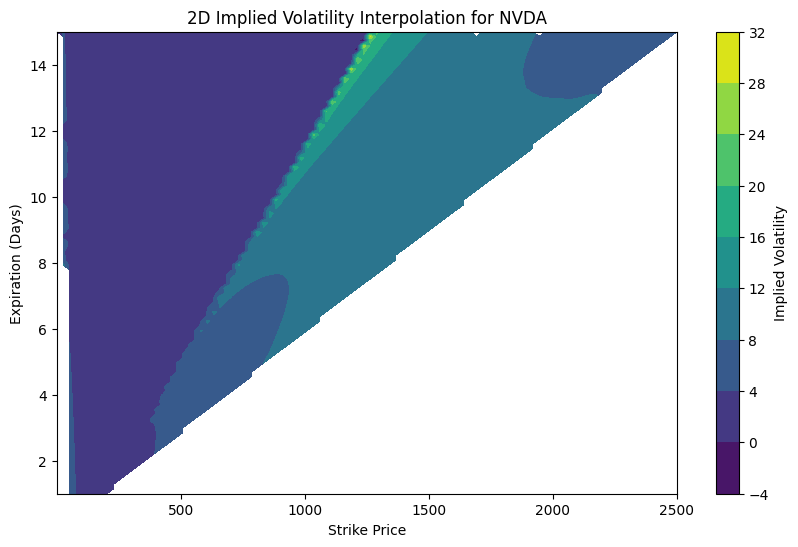

In [5]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime

# Define the ticker symbol
ticker = 'NVDA'

# Fetch the options data for a given stock ticker
stock = yf.Ticker(ticker)

# Initialize lists to store strikes, expirations, and implied volatilities
strikes = []
expirations = []
implied_vols = []

# Get the list of expiration dates
exp_dates = stock.options[:3]  # Limit to first 3 expiration dates for this example

# Loop through expiration dates and strikes to collect implied volatility data
for exp_date in exp_dates:
    options = stock.option_chain(exp_date)
    calls = options.calls  # We focus on call options in this example

    # Loop through each call option's strike and implied volatility
    for index, row in calls.iterrows():
        strike = row['strike']
        iv = row['impliedVolatility']
        expiration_days = (datetime.strptime(exp_date, '%Y-%m-%d') - datetime.now()).days

        # Store data
        strikes.append(strike)
        expirations.append(expiration_days)
        implied_vols.append(iv)

# Convert to numpy arrays
strikes = np.array(strikes)
expirations = np.array(expirations)
implied_vols = np.array(implied_vols)

# Create a grid for strikes and expirations for interpolation
strike_grid = np.linspace(min(strikes), max(strikes), 100)
expiration_grid = np.linspace(min(expirations), max(expirations), 100)
strike_grid, expiration_grid = np.meshgrid(strike_grid, expiration_grid)

# Interpolating the implied volatilities over the 2D space
implied_vols_grid = griddata(
    (strikes, expirations),
    implied_vols,
    (strike_grid, expiration_grid),
    method='cubic'
)

# Plot the interpolated volatility surface
plt.figure(figsize=(10, 6))
cp = plt.contourf(strike_grid, expiration_grid, implied_vols_grid, cmap='viridis')
plt.colorbar(cp, label="Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Expiration (Days)")
plt.title(f"2D Implied Volatility Interpolation for {ticker}")
plt.show()



### Step 6: Visualization of the Interpolated Volatility Surface
Finally, we use a contour plot to visualize the interpolated volatility surface, with strike prices on the x-axis and expiration days on the y-axis.
